##Creating a Neural Network for classification
Okay now you have reached the exciting part of this tutorial! No more math and complex explinations. Time to get hands on and train a very basic neural network.

*As stated earlier this guide is based off of the following TensorFlow tutorial.*
https://www.tensorflow.org/tutorials/keras/classification


###Imports

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


Let's have a look at this data to see what we are working with.

In [3]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

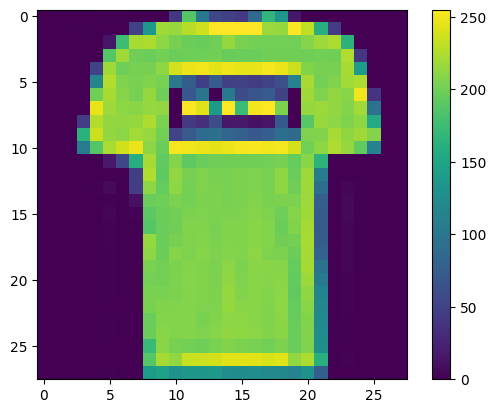

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.



In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [11]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.4962 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3732 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3129 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2963 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2562 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8818
Test accuracy: 0.8817999958992004


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

##Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [14]:
predictions[0]

array([7.7115530e-08, 3.7069914e-10, 1.1743357e-08, 9.5678210e-10,
       9.1029634e-08, 7.6181156e-04, 3.4068708e-07, 2.9957090e-02,
       8.7612158e-08, 9.6928048e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called ```argmax()```. This simply returns the index of the maximium value from a numpy array.

In [15]:
np.argmax(predictions[0])

9

And we can check if this is correct by looking at the value of the cooresponding test label.

In [16]:
test_labels[0]

9

##Verifying Predictions
I've written a small function here to help us verify predictions with some simple visuals.

Pick a number: 9
1/1 [==============================] - 0s 20ms/step


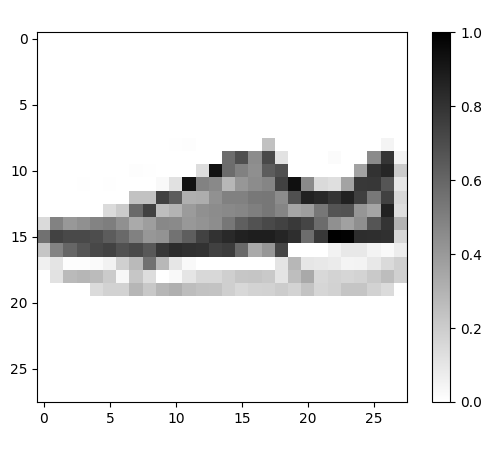

In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


And that's pretty much it for an introduction to neural networks!

##Sources

1. Doshi, Sanket. “Various Optimization Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

2. “Basic Classification: Classify Images of Clothing &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

3. “Gradient Descent¶.” Gradient Descent - ML Glossary Documentation, www.ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html.

4. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

5. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.